# Task 2

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:\\Users\\dhara\\Documents\\Datascience\\MYNOTES\\DL Projects\\CV_9\\train',
                                                 target_size = (64, 64),
                                                 batch_size = 2,
                                                 class_mode = 'binary')
val_set = val_datagen.flow_from_directory('C:\\Users\\dhara\\Documents\\Datascience\\MYNOTES\\DL Projects\\CV_9\\Val',
                                            target_size = (64, 64),
                                            batch_size = 2,
                                            class_mode = 'binary')

model.fit(training_set,
                         steps_per_epoch = 10,
                         epochs = 40,
                         validation_data = val_set,
                         validation_steps = 2)



model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.weights.h5")
print("Saved model to disk")

C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 20 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\myenv\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - accuracy: 0.7674 - loss: 4.6799 - val_accuracy: 0.7500 - val_loss: 0.6768
Epoch 2/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.4419 - loss: 1.2003 - val_accuracy: 0.7500 - val_loss: 0.6890
Epoch 3/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.5831 - loss: 0.9136 - val_accuracy: 0.5000 - val_loss: 0.7144
Epoch 4/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.5489 - loss: 0.8904 - val_accuracy: 0.2500 - val_loss: 0.7807
Epoch 5/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.6574 - loss: 0.6717 - val_accuracy: 0.5000 - val_loss: 0.6602
Epoch 6/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.7101 - loss: 0.6791 - val_accuracy: 0.5000 - val_loss: 0.7625
Epoch 7/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.8874 - loss: 0.4873 - val_accuracy: 0.7500 - val_loss: 0.8388
Epoch 8/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.5785 - loss: 0.6310 - val_accuracy: 0.

In [2]:
from keras.models import model_from_json
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("model.weights.h5")
print("Loaded model from disk")

def classify(img_file):
    img_name = img_file
    test_image = load_img(img_name, target_size = (64, 64))
    # import pdb;pdb.set_trace()
    # test_image = load_img.img_to_array(test_image)
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)
    # import pdb;pdb.set_trace()
    if result[0][0] == 0:
        prediction = 'car'
    else:
        prediction = 'lorry'
    print(prediction,img_name)


import os
path = 'C:\\Users\\dhara\\Documents\\Datascience\\MYNOTES\\DL Projects\\CV_9\\test'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            files.append(os.path.join(r, file))
for f in files:
    classify(f)
    print('\n')

Loaded model from disk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
lorry C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000002.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
lorry C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000003.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
lorry C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000004.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
lorry C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000005.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
lorry C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000006.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
lorry C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000007.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
lorry C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000008.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
lorry C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\

In [3]:
import matplotlib.pyplot as plt

def classify_and_visualize(img_file):
    img_name = img_file
    test_image = load_img(img_name, target_size=(64, 64))
    test_image_array = img_to_array(test_image)
    test_image = np.expand_dims(test_image_array, axis=0)
    result = model.predict(test_image)
    if result[0][0] == 0:
        prediction = 'car'
    else:
        prediction = 'lorry'
    
    # Display the image and prediction
    plt.imshow(test_image_array.astype('uint8'))
    plt.title(f'Prediction: {prediction}')
    plt.axis('off')
    plt.show()

    print(f'Prediction: {prediction}, File: {img_name}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


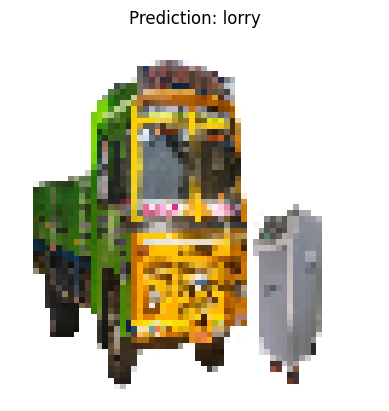

Prediction: lorry, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000002.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


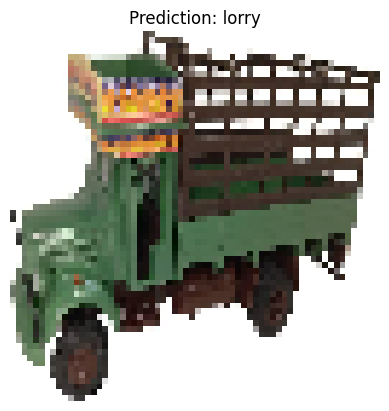

Prediction: lorry, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000003.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


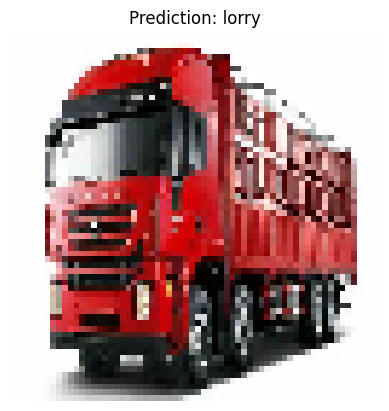

Prediction: lorry, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000004.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


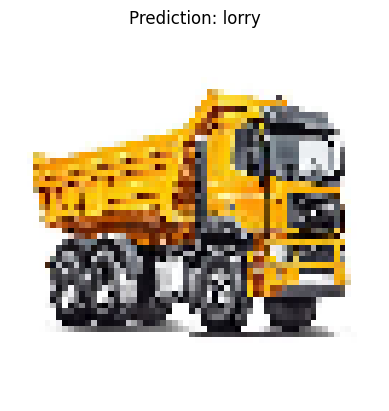

Prediction: lorry, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000005.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


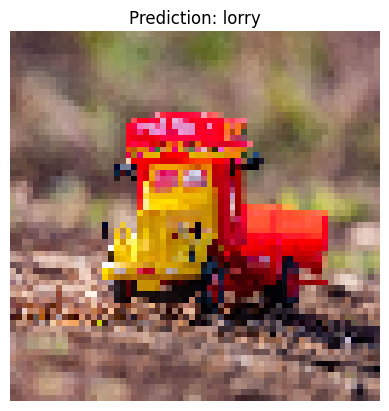

Prediction: lorry, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000006.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


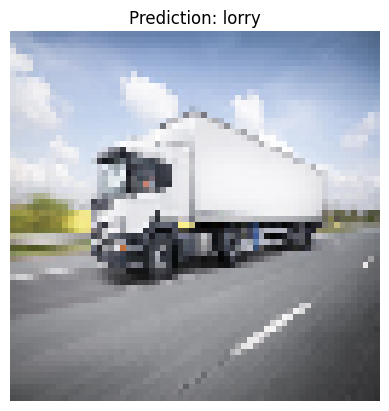

Prediction: lorry, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000007.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


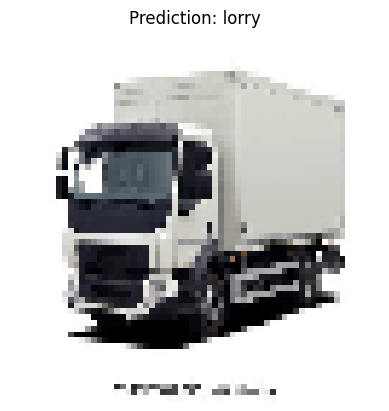

Prediction: lorry, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000008.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


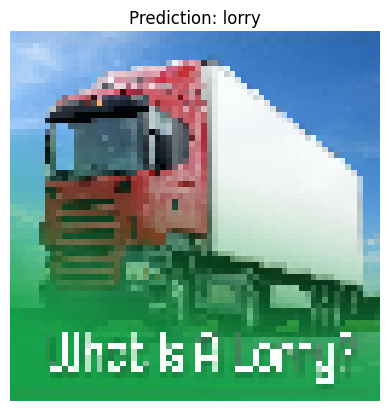

Prediction: lorry, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000009.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


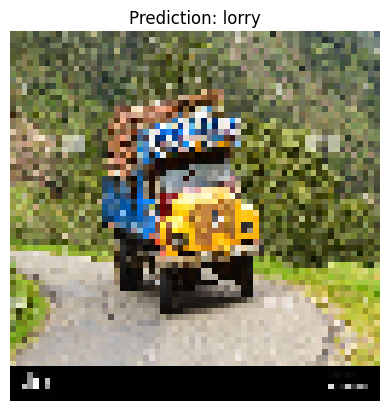

Prediction: lorry, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000010.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


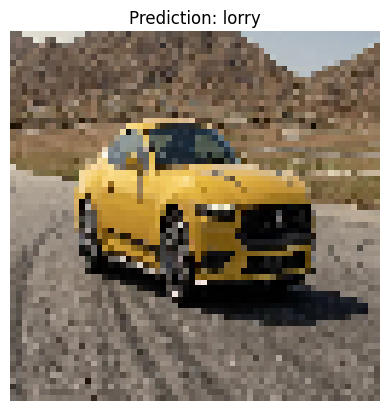

Prediction: lorry, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000014.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


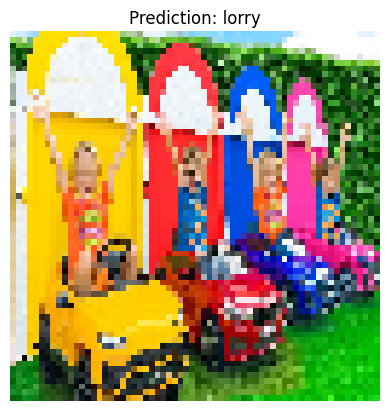

Prediction: lorry, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000015.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


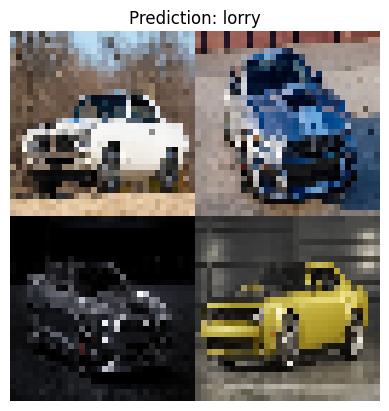

Prediction: lorry, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000018.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


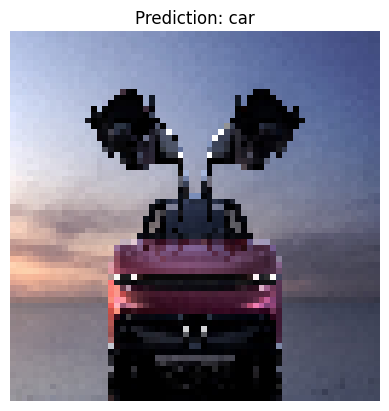

Prediction: car, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000019.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


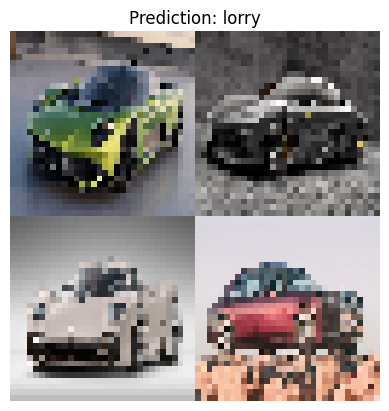

Prediction: lorry, File: C:\Users\dhara\Documents\Datascience\MYNOTES\DL Projects\CV_9\test\000020.jpg




In [4]:
for f in files:
    classify_and_visualize(f)
    print('\n')


In [5]:
import pickle

# Save the trained model
model.save('image_classification_model.h5')
